In [63]:
import torch
import itertools

dataset_model = 'mnist_lenet'

dict0 = torch.load(f'nuqls_performance_experiment/{dataset_model}/dict_0.pt')
dict1 = torch.load(f'nuqls_performance_experiment/{dataset_model}/dict_1.pt')
dict2 = torch.load(f'nuqls_performance_experiment/{dataset_model}/dict_2.pt')
dict3 = torch.load(f'nuqls_performance_experiment/{dataset_model}/dict_3.pt')
dict4 = torch.load(f'nuqls_performance_experiment/{dataset_model}/dict_4.pt')

map_train_loss = (dict0['map_train_loss'] + dict1['map_train_loss'] + dict2['map_train_loss'] + dict3['map_train_loss'] + dict4['map_train_loss'])/5

n = len(dict0['lr'])
lr = set(dict0['lr'])
epoch = set(dict0['epoch'])
gamma = set(dict0['gamma'])
bs = set(dict0['bs'])

lr_epoch = [lr,epoch]

plot_dict_mnist = {}

for bsi in bs:
    plot_dict_mnist[f'{bsi}'] = {}
    for element in itertools.product(*lr_epoch):
        plot_dict_mnist[f'{bsi}'][f'{element[0]}_{element[1]}'] = {'gamma': [],
                                                             'nuqls_train_loss': [],
                                                             'acc': [],
                                                             'ece': [],
                                                             'aucroc': [],
                                                             'oodauc': []}

for i in range(n):
    key_1 = f'{dict0["bs"][i]}'
    key_2 = f'{dict0["lr"][i]}_{dict0["epoch"][i]}'
    plot_dict_mnist[key_1][key_2]['gamma'].append((dict0['gamma'][i] + dict1['gamma'][i] + dict2['gamma'][i] + dict3['gamma'][i] + dict4['gamma'][i])/5)
    plot_dict_mnist[key_1][key_2]['nuqls_train_loss'].append((dict0['nuqls_train_loss'][i] + dict1['nuqls_train_loss'][i] + dict2['nuqls_train_loss'][i] + dict3['nuqls_train_loss'][i] + dict4['nuqls_train_loss'][i])/5)
    plot_dict_mnist[key_1][key_2]['acc'].append((dict0['acc'][i] + dict1['acc'][i] + dict2['acc'][i] + dict3['acc'][i] + dict4['acc'][i])/5)
    plot_dict_mnist[key_1][key_2]['ece'].append((dict0['ece'][i] + dict1['ece'][i] + dict2['ece'][i] + dict3['ece'][i] + dict4['ece'][i])/5)
    plot_dict_mnist[key_1][key_2]['aucroc'].append((dict0['aucroc'][i] + dict1['aucroc'][i] + dict2['aucroc'][i] + dict3['aucroc'][i] + dict4['aucroc'][i])/5)
    plot_dict_mnist[key_1][key_2]['oodauc'].append((dict0['oodauc'][i] + dict1['oodauc'][i] + dict2['oodauc'][i] + dict3['oodauc'][i] + dict4['oodauc'][i])/5)


In [64]:
import torch
import itertools

dataset_model = 'fmnist_lenet'

dict0 = torch.load(f'nuqls_performance_experiment/{dataset_model}/dict_0.pt')
dict1 = torch.load(f'nuqls_performance_experiment/{dataset_model}/dict_1.pt')
dict2 = torch.load(f'nuqls_performance_experiment/{dataset_model}/dict_2.pt')
dict3 = torch.load(f'nuqls_performance_experiment/{dataset_model}/dict_3.pt')
dict4 = torch.load(f'nuqls_performance_experiment/{dataset_model}/dict_4.pt')

map_train_loss = (dict0['map_train_loss'] + dict1['map_train_loss'] + dict2['map_train_loss'] + dict3['map_train_loss'] + dict4['map_train_loss'])/5

n = len(dict0['lr'])
lr = set(dict0['lr'])
epoch = set(dict0['epoch'])
gamma = set(dict0['gamma'])
bs = set(dict0['bs'])

lr_epoch_fmnist = [lr,epoch]

plot_dict_fmnist = {}

for bsi in bs:
    plot_dict_fmnist[f'{bsi}'] = {}
    for element in itertools.product(*lr_epoch):
        plot_dict_fmnist[f'{bsi}'][f'{element[0]}_{element[1]}'] = {'gamma': [],
                                                             'nuqls_train_loss': [],
                                                             'acc': [],
                                                             'ece': [],
                                                             'aucroc': [],
                                                             'oodauc': []}

for i in range(n):
    key_1 = f'{dict0["bs"][i]}'
    key_2 = f'{dict0["lr"][i]}_{dict0["epoch"][i]}'
    plot_dict_fmnist[key_1][key_2]['gamma'].append((dict0['gamma'][i] + dict1['gamma'][i] + dict2['gamma'][i] + dict3['gamma'][i] + dict4['gamma'][i])/5)
    plot_dict_fmnist[key_1][key_2]['nuqls_train_loss'].append((dict0['nuqls_train_loss'][i] + dict1['nuqls_train_loss'][i] + dict2['nuqls_train_loss'][i] + dict3['nuqls_train_loss'][i] + dict4['nuqls_train_loss'][i])/5)
    plot_dict_fmnist[key_1][key_2]['acc'].append((dict0['acc'][i] + dict1['acc'][i] + dict2['acc'][i] + dict3['acc'][i] + dict4['acc'][i])/5)
    plot_dict_fmnist[key_1][key_2]['ece'].append((dict0['ece'][i] + dict1['ece'][i] + dict2['ece'][i] + dict3['ece'][i] + dict4['ece'][i])/5)
    plot_dict_fmnist[key_1][key_2]['aucroc'].append((dict0['aucroc'][i] + dict1['aucroc'][i] + dict2['aucroc'][i] + dict3['aucroc'][i] + dict4['aucroc'][i])/5)
    plot_dict_fmnist[key_1][key_2]['oodauc'].append((dict0['oodauc'][i] + dict1['oodauc'][i] + dict2['oodauc'][i] + dict3['oodauc'][i] + dict4['oodauc'][i])/5)


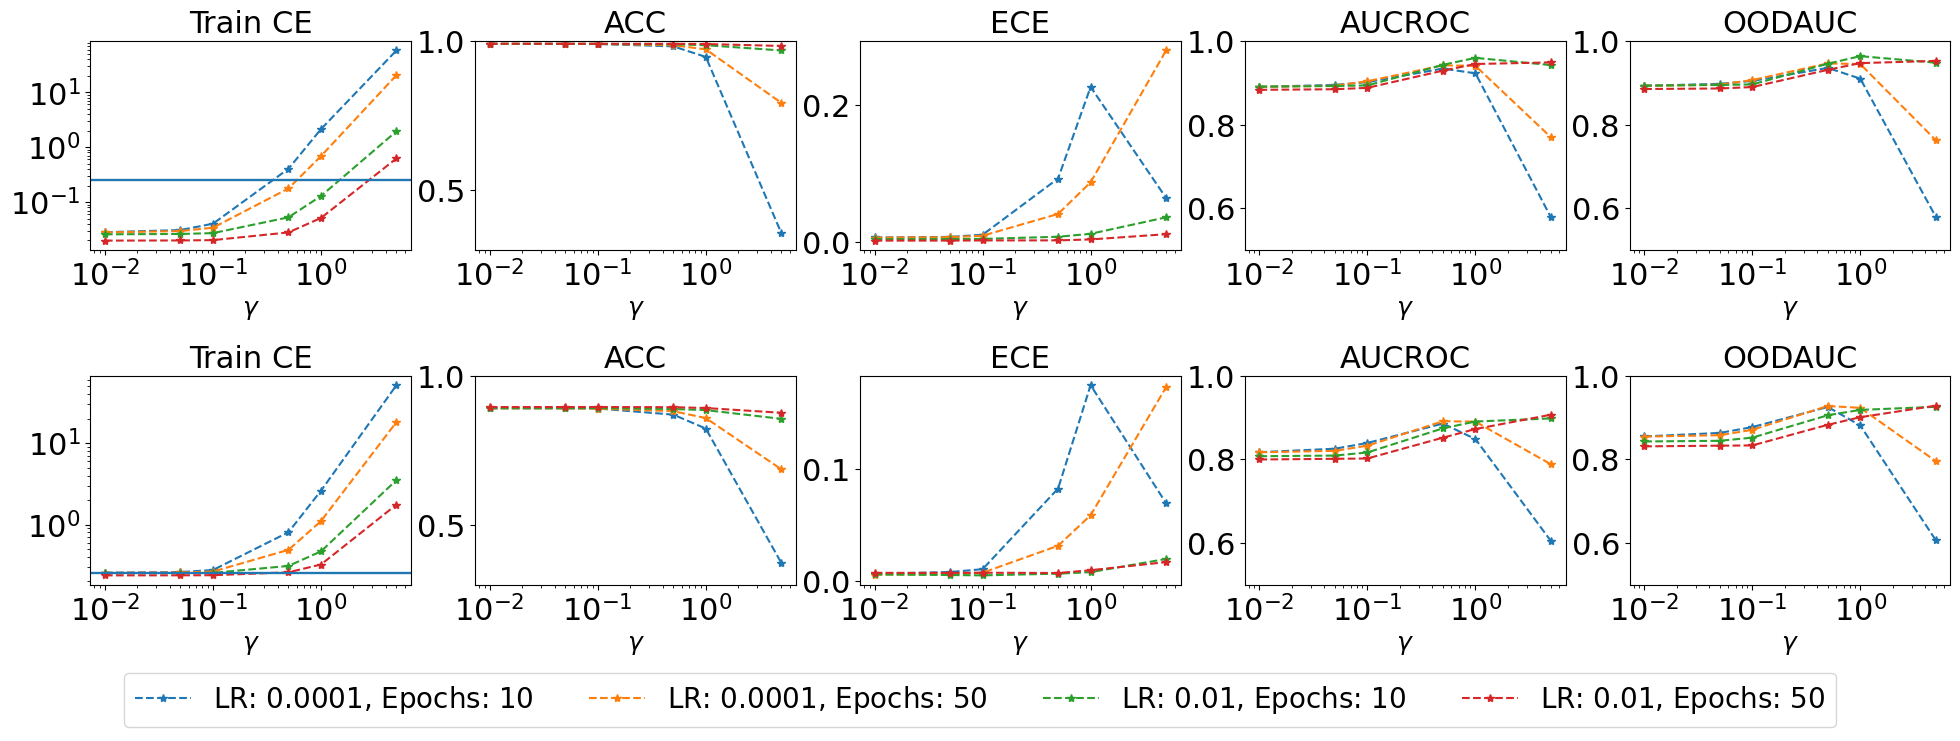

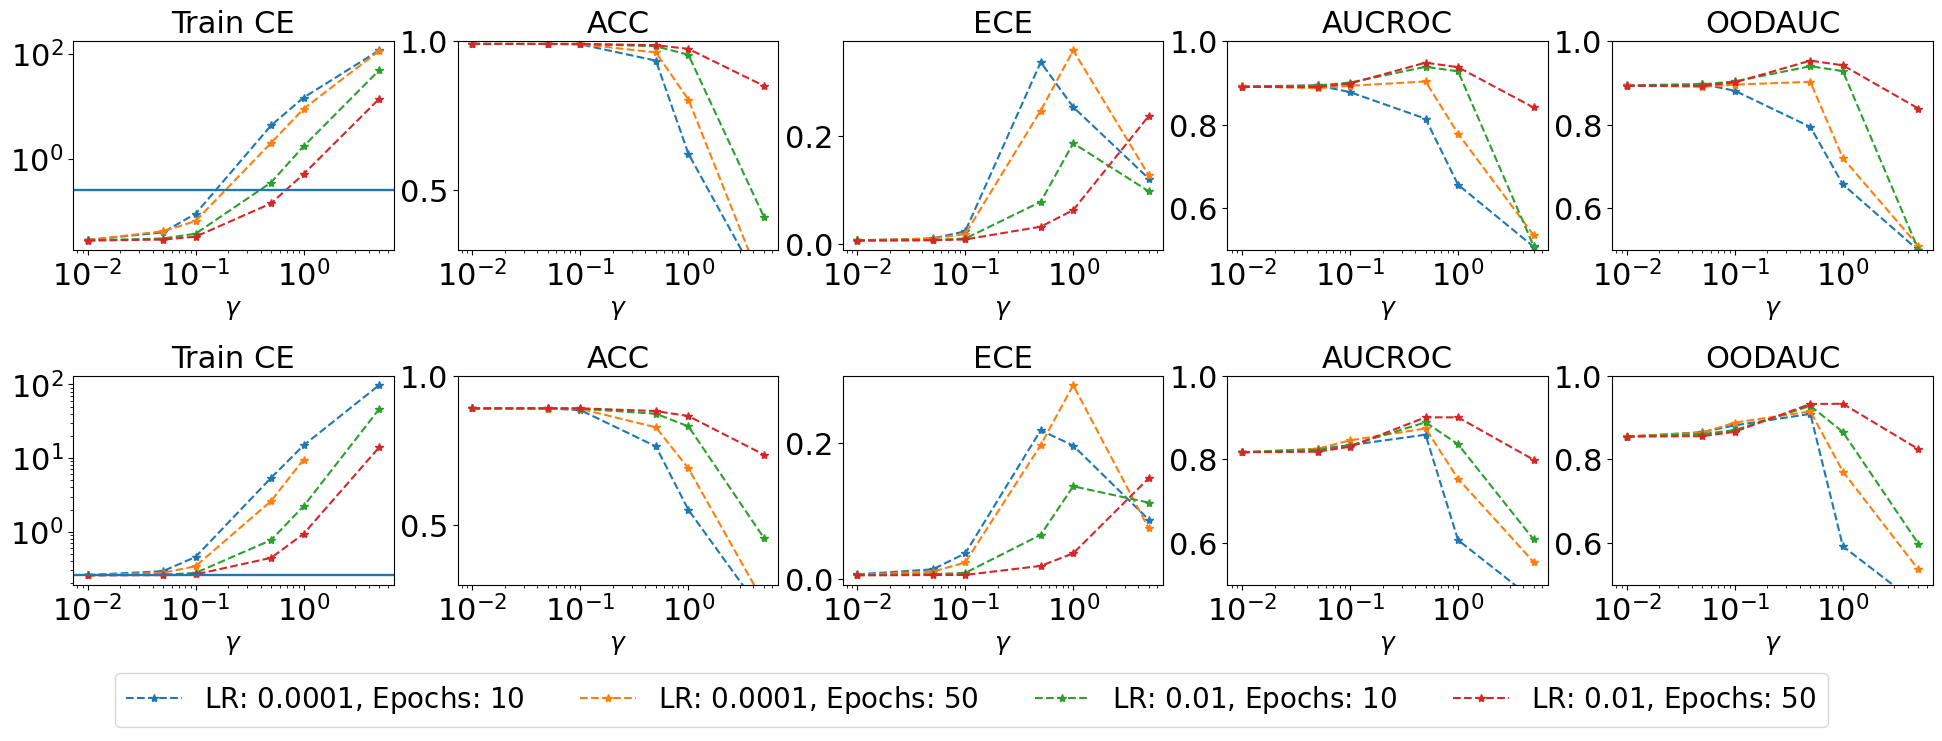

In [80]:
import matplotlib.pyplot as plt
import os
w, h, fs, fs_legend = 24, 8, 22, 20

fig_save_folder = f'figures/nuqls_experiment/'
if not os.path.exists(fig_save_folder):
    os.makedirs(fig_save_folder)

for bs in plot_dict_fmnist.keys():
    # ax1 : loss
    # ax2 : acc
    # ax3 : ece
    # ax4 : aucroc
    # ax5 : oodauc
    fig, ((ax1,ax2,ax3,ax4,ax5),(ax6,ax7,ax8,ax9,ax10)) = plt.subplots(2,5, figsize = (1*w,1*h))
    fig.subplots_adjust(hspace=0.6)
    fig.subplots_adjust(bottom=0.2)
    
    # MNIST
    for lr_epoch in plot_dict_mnist[bs].keys():
        lr, epoch = lr_epoch.split('_')
        label = f'LR: ${lr}$, Epochs: ${epoch}$'

        ax1.plot(plot_dict_mnist[bs][lr_epoch]['gamma'], plot_dict_mnist[bs][lr_epoch]['nuqls_train_loss'], '--*', label=label)
        ax1.axhline(map_train_loss)
        ax1.set_xscale('log')
        ax1.set_yscale('log')
        ax1.set_title('Train CE', fontsize=fs)
        ax1.set_xlabel('$\gamma$', fontsize=(fs - 4))
        ax1.tick_params(labelsize=fs)

        ax2.plot(plot_dict_mnist[bs][lr_epoch]['gamma'], plot_dict_mnist[bs][lr_epoch]['acc'], '--*', label=label)
        ax2.set_title('ACC', fontsize=fs)
        ax2.set_ylim(0.3,1)
        ax2.set_yticks([0.5,1])
        ax2.set_xscale('log')
        ax2.set_xlabel('$\gamma$', fontsize=(fs - 4))
        ax2.tick_params(labelsize=fs)

        ax3.plot(plot_dict_mnist[bs][lr_epoch]['gamma'], plot_dict_mnist[bs][lr_epoch]['ece'], '--*', label=label)
        ax3.set_title('ECE', fontsize=fs)
        ax3.set_xscale('log')
        ax3.set_xlabel('$\gamma$', fontsize=(fs - 4))
        ax3.tick_params(labelsize=fs)

        ax4.plot(plot_dict_mnist[bs][lr_epoch]['gamma'], plot_dict_mnist[bs][lr_epoch]['aucroc'], '--*', label=label)
        ax4.set_title('AUCROC', fontsize=fs)
        ax4.set_ylim(0.5,1)
        ax4.set_xscale('log')
        ax4.set_xlabel('$\gamma$', fontsize=(fs - 4))
        ax4.tick_params(labelsize=fs)
        
        ax5.plot(plot_dict_mnist[bs][lr_epoch]['gamma'], plot_dict_mnist[bs][lr_epoch]['oodauc'], '--*', label=label)
        ax5.set_title('OODAUC', fontsize=fs)
        ax5.set_ylim(0.5,1)
        ax5.set_xscale('log')
        ax5.set_xlabel('$\gamma$', fontsize=(fs - 4))
        ax5.tick_params(labelsize=fs)

    # FMNIST
    for lr_epoch in plot_dict_fmnist[bs].keys():
        lr, epoch = lr_epoch.split('_')
        label = f'LR: ${lr}$, Epochs: ${epoch}$'

        ax6.plot(plot_dict_fmnist[bs][lr_epoch]['gamma'], plot_dict_fmnist[bs][lr_epoch]['nuqls_train_loss'], '--*', label=label)
        ax6.axhline(map_train_loss)
        ax6.set_xscale('log')
        ax6.set_yscale('log')
        ax6.set_title('Train CE', fontsize=fs)
        ax6.set_xlabel('$\gamma$', fontsize=(fs - 4))
        ax6.tick_params(labelsize=fs)

        ax7.plot(plot_dict_fmnist[bs][lr_epoch]['gamma'], plot_dict_fmnist[bs][lr_epoch]['acc'], '--*', label=label)
        ax7.set_title('ACC', fontsize=fs)
        ax7.set_ylim(0.3,1)
        ax7.set_yticks([0.5,1])
        ax7.set_xscale('log')
        ax7.set_xlabel('$\gamma$', fontsize=(fs - 4))
        ax7.tick_params(labelsize=fs)

        ax8.plot(plot_dict_fmnist[bs][lr_epoch]['gamma'], plot_dict_fmnist[bs][lr_epoch]['ece'], '--*', label=label)
        ax8.set_title('ECE', fontsize=fs)
        ax8.set_xscale('log')
        ax8.set_xlabel('$\gamma$', fontsize=(fs - 4))
        ax8.tick_params(labelsize=fs)

        ax9.plot(plot_dict_fmnist[bs][lr_epoch]['gamma'], plot_dict_fmnist[bs][lr_epoch]['aucroc'], '--*', label=label)
        ax9.set_title('AUCROC', fontsize=fs)
        ax9.set_ylim(0.5,1)
        ax9.set_xscale('log')
        ax9.set_xlabel('$\gamma$', fontsize=(fs - 4))
        ax9.tick_params(labelsize=fs)
        
        ax10.plot(plot_dict_fmnist[bs][lr_epoch]['gamma'], plot_dict_fmnist[bs][lr_epoch]['oodauc'], '--*', label=label)
        ax10.set_title('OODAUC', fontsize=fs)
        ax10.set_ylim(0.5,1)
        ax10.set_xscale('log')
        ax10.set_xlabel('$\gamma$', fontsize=(fs - 4))
        ax10.tick_params(labelsize=fs)

    lines = [] 
    labels = []

    # for ax in fig.axes: 
    Line, Label = ax1.get_legend_handles_labels() 
    # print(Label) 
    lines.extend(Line) 
    labels.extend(Label)

    fig.legend(lines, labels, loc='lower center', prop={'size': fs_legend}, frameon=True, ncol=4, ) 

    

    plt.plot()
    plt.savefig(fname=fig_save_folder + f'combined_{bs}_gamma.pdf', format='pdf', bbox_inches='tight')
    plt.show()


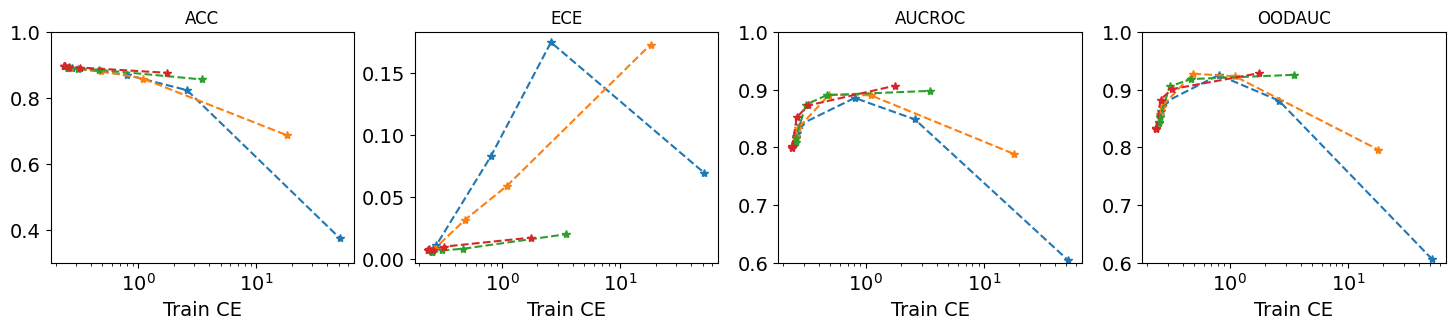

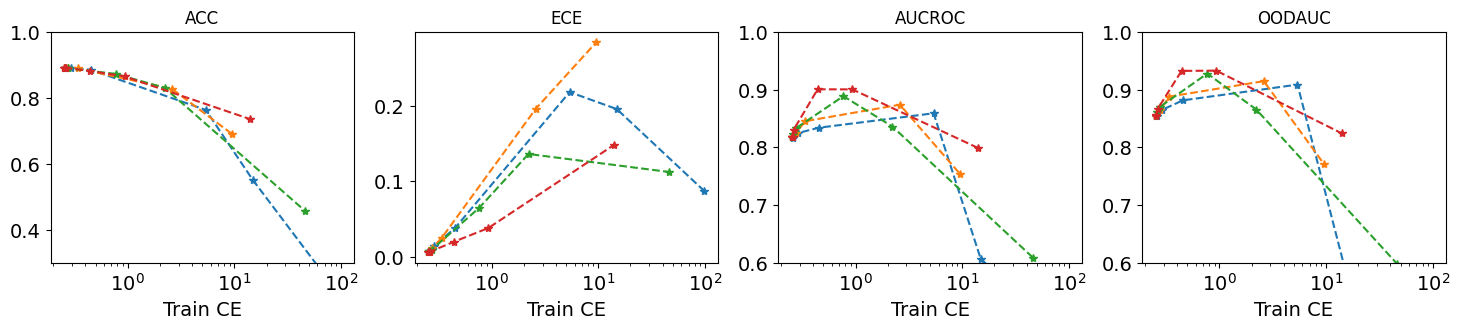

In [9]:
import matplotlib.pyplot as plt
import os
w, h, fs = 18, 3, 14

fig_save_folder = f'figures/nuqls_experiment/'
if not os.path.exists(fig_save_folder):
    os.makedirs(fig_save_folder)

for bs in plot_dict.keys():
    # ax1 : loss
    # ax2 : acc
    # ax3 : ece
    # ax4 : aucroc
    # ax5 : oodauc
    fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4, figsize = (1*w,1*h))
    # fig.subplots_adjust(hspace=0.6)
    
    for lr_epoch in plot_dict[bs].keys():
        lr, epoch = lr_epoch.split('_')
        label = f'learning rate: {lr}, epochs: {epoch}'

        ax1.plot(plot_dict[bs][lr_epoch]['nuqls_train_loss'], plot_dict[bs][lr_epoch]['acc'], '--*', label=label)
        ax1.set_title('ACC')
        ax1.set_ylim(0.3,1)
        ax1.set_xscale('log')
        ax1.set_xlabel('Train CE', fontsize=fs)
        ax1.tick_params(labelsize=fs)

        ax2.plot(plot_dict[bs][lr_epoch]['nuqls_train_loss'], plot_dict[bs][lr_epoch]['ece'], '--*', label=label)
        ax2.set_title('ECE')
        ax2.set_xscale('log')
        ax2.set_xlabel('Train CE', fontsize=fs)
        ax2.tick_params(labelsize=fs)

        ax3.plot(plot_dict[bs][lr_epoch]['nuqls_train_loss'], plot_dict[bs][lr_epoch]['aucroc'], '--*', label=label)
        ax3.set_title('AUCROC')
        ax3.set_ylim(0.6,1)
        ax3.set_xscale('log')
        ax3.set_xlabel('Train CE', fontsize=fs)
        ax3.tick_params(labelsize=fs)
        
        ax4.plot(plot_dict[bs][lr_epoch]['nuqls_train_loss'], plot_dict[bs][lr_epoch]['oodauc'], '--*', label=label)
        ax4.set_title('OODAUC')
        ax4.set_ylim(0.6,1)
        ax4.set_xscale('log')
        ax4.set_xlabel('Train CE', fontsize=fs)
        ax4.tick_params(labelsize=fs)

    lines = [] 
    labels = []

    # for ax in fig.axes: 
    Line, Label = ax1.get_legend_handles_labels() 
    # print(Label) 
    lines.extend(Line) 
    labels.extend(Label)

    # fig.legend(lines, labels, loc=(0.71,0.205), prop={'size': 12}, frameon=False) 

    

    plt.plot()
    plt.savefig(fname=fig_save_folder + f'{dataset_model}_{bs}_loss.pdf', format='pdf')
    plt.show()


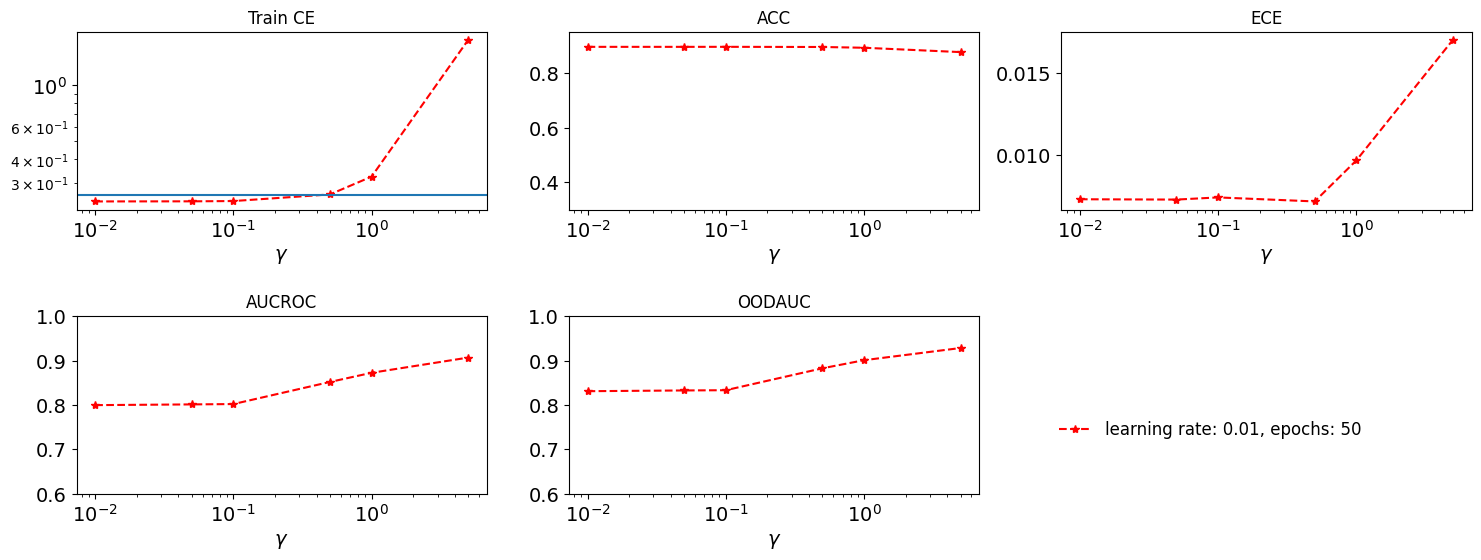

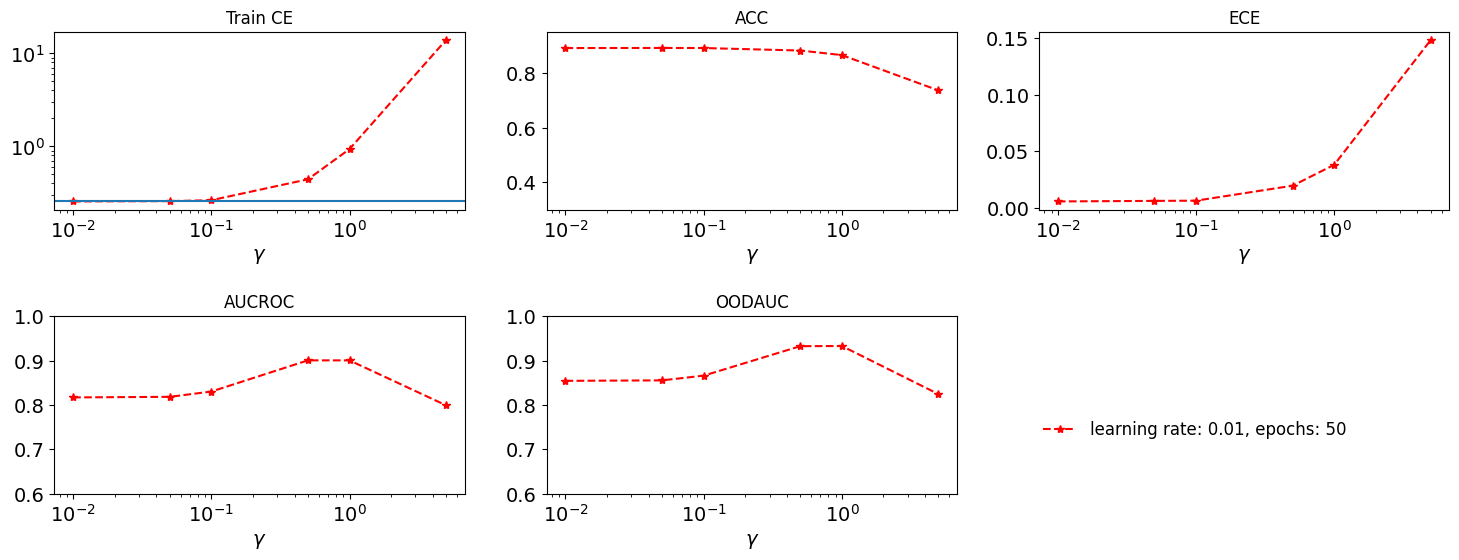

In [65]:
import matplotlib.pyplot as plt
import os
w, h, fs = 18, 6, 14

fig_save_folder = f'figures/nuqls_experiment/'
if not os.path.exists(fig_save_folder):
    os.makedirs(fig_save_folder)

for bs in plot_dict.keys():
    # ax1 : loss
    # ax2 : acc
    # ax3 : ece
    # ax4 : aucroc
    # ax5 : oodauc
    fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3, figsize = (1*w,1*h))
    fig.subplots_adjust(hspace=0.6)
    
    for lr_epoch in plot_dict[bs].keys():
        lr, epoch = lr_epoch.split('_')
        label = f'learning rate: {lr}, epochs: {epoch}'
        if lr == '0.01' and epoch == '50':

            ax1.plot(plot_dict[bs][lr_epoch]['gamma'], plot_dict[bs][lr_epoch]['nuqls_train_loss'], '--r*', label=label)
            ax1.axhline(map_train_loss)
            # ax1.set_ylim(0,20)
            ax1.set_xscale('log')
            ax1.set_yscale('log')
            ax1.set_title('Train CE')
            ax1.set_xlabel('$\gamma$', fontsize=fs)
            ax1.tick_params(labelsize=fs)

            ax2.plot(plot_dict[bs][lr_epoch]['gamma'], plot_dict[bs][lr_epoch]['acc'], '--r*', label=label)
            ax2.set_title('ACC')
            ax2.set_ylim(0.3,0.95)
            ax2.set_xscale('log')
            ax2.set_xlabel('$\gamma$', fontsize=fs)
            ax2.tick_params(labelsize=fs)

            ax3.plot(plot_dict[bs][lr_epoch]['gamma'], plot_dict[bs][lr_epoch]['ece'], '--r*', label=label)
            ax3.set_title('ECE')
            ax3.set_xscale('log')
            ax3.set_xlabel('$\gamma$', fontsize=fs)
            ax3.tick_params(labelsize=fs)

            ax4.plot(plot_dict[bs][lr_epoch]['gamma'], plot_dict[bs][lr_epoch]['aucroc'], '--r*', label=label)
            ax4.set_title('AUCROC')
            ax4.set_ylim(0.6,1)
            ax4.set_xscale('log')
            ax4.set_xlabel('$\gamma$', fontsize=fs)
            ax4.tick_params(labelsize=fs)
            
            ax5.plot(plot_dict[bs][lr_epoch]['gamma'], plot_dict[bs][lr_epoch]['oodauc'], '--r*', label=label)
            ax5.set_title('OODAUC')
            ax5.set_ylim(0.6,1)
            ax5.set_xscale('log')
            ax5.set_xlabel('$\gamma$', fontsize=fs)
            ax5.tick_params(labelsize=fs)
            # ax5.legend()

    ax6.remove()

    lines = [] 
    labels = []

    # for ax in fig.axes: 
    Line, Label = ax1.get_legend_handles_labels() 
    # print(Label) 
    lines.extend(Line) 
    labels.extend(Label)

    fig.legend(lines, labels, loc=(0.71,0.205), prop={'size': 12}, frameon=False) 

    

    plt.plot()
    plt.savefig(fname=fig_save_folder + f'{dataset}_{bs}_gamma.pdf', format='pdf')
    plt.show()


In [3]:
import torch
import itertools

dataset_model = 'mnist_lenet'

dict0 = torch.load(f'results/nuqls_performance_experiment/True/subsample/{dataset_model}/dict_0.pt')
dict1 = torch.load(f'results/nuqls_performance_experiment/True/subsample/{dataset_model}/dict_1.pt')
dict2 = torch.load(f'results/nuqls_performance_experiment/True/subsample/{dataset_model}/dict_2.pt')
dict3 = torch.load(f'results/nuqls_performance_experiment/True/subsample/{dataset_model}/dict_3.pt')
dict4 = torch.load(f'results/nuqls_performance_experiment/True/subsample/{dataset_model}/dict_3.pt')

In [4]:
dict0.keys()

dict_keys(['map_train_loss', 'lr', 'epoch', 'gamma', 'bs', 'nuqls_train_loss', 'acc', 'ece', 'aucroc', 'oodauc'])

In [5]:
map_train_loss = (dict0['map_train_loss'] + dict1['map_train_loss'] + dict2['map_train_loss'] + dict3['map_train_loss'] + dict4['map_train_loss'])/5


lr = dict0['lr']
epoch = dict0['epoch']
gamma = dict0['gamma']
n = len(gamma)
bs = dict0['bs']

lr_epoch = [lr,epoch]

plot_dict = {'gamma': [],
            'nuqls_train_loss': [],
            'acc': [],
            'ece': [],
            'aucroc': [],
            'oodauc': []
            }

for i in range(n):
    plot_dict['gamma'].append((dict0['gamma'][i] + dict1['gamma'][i] + dict2['gamma'][i] + dict3['gamma'][i] + dict4['gamma'][i])/5)
    plot_dict['nuqls_train_loss'].append((dict0['nuqls_train_loss'][i] + dict1['nuqls_train_loss'][i] + dict2['nuqls_train_loss'][i] + dict3['nuqls_train_loss'][i] + dict4['nuqls_train_loss'][i])/5)
    plot_dict['acc'].append((dict0['acc'][i] + dict1['acc'][i] + dict2['acc'][i] + dict3['acc'][i] + dict4['acc'][i])/5)
    plot_dict['ece'].append((dict0['ece'][i] + dict1['ece'][i] + dict2['ece'][i] + dict3['ece'][i] + dict4['ece'][i])/5)
    plot_dict['aucroc'].append((dict0['aucroc'][i] + dict1['aucroc'][i] + dict2['aucroc'][i] + dict3['aucroc'][i] + dict4['aucroc'][i])/5)
    plot_dict['oodauc'].append((dict0['oodauc'][i] + dict1['oodauc'][i] + dict2['oodauc'][i] + dict3['oodauc'][i] + dict4['oodauc'][i])/5)


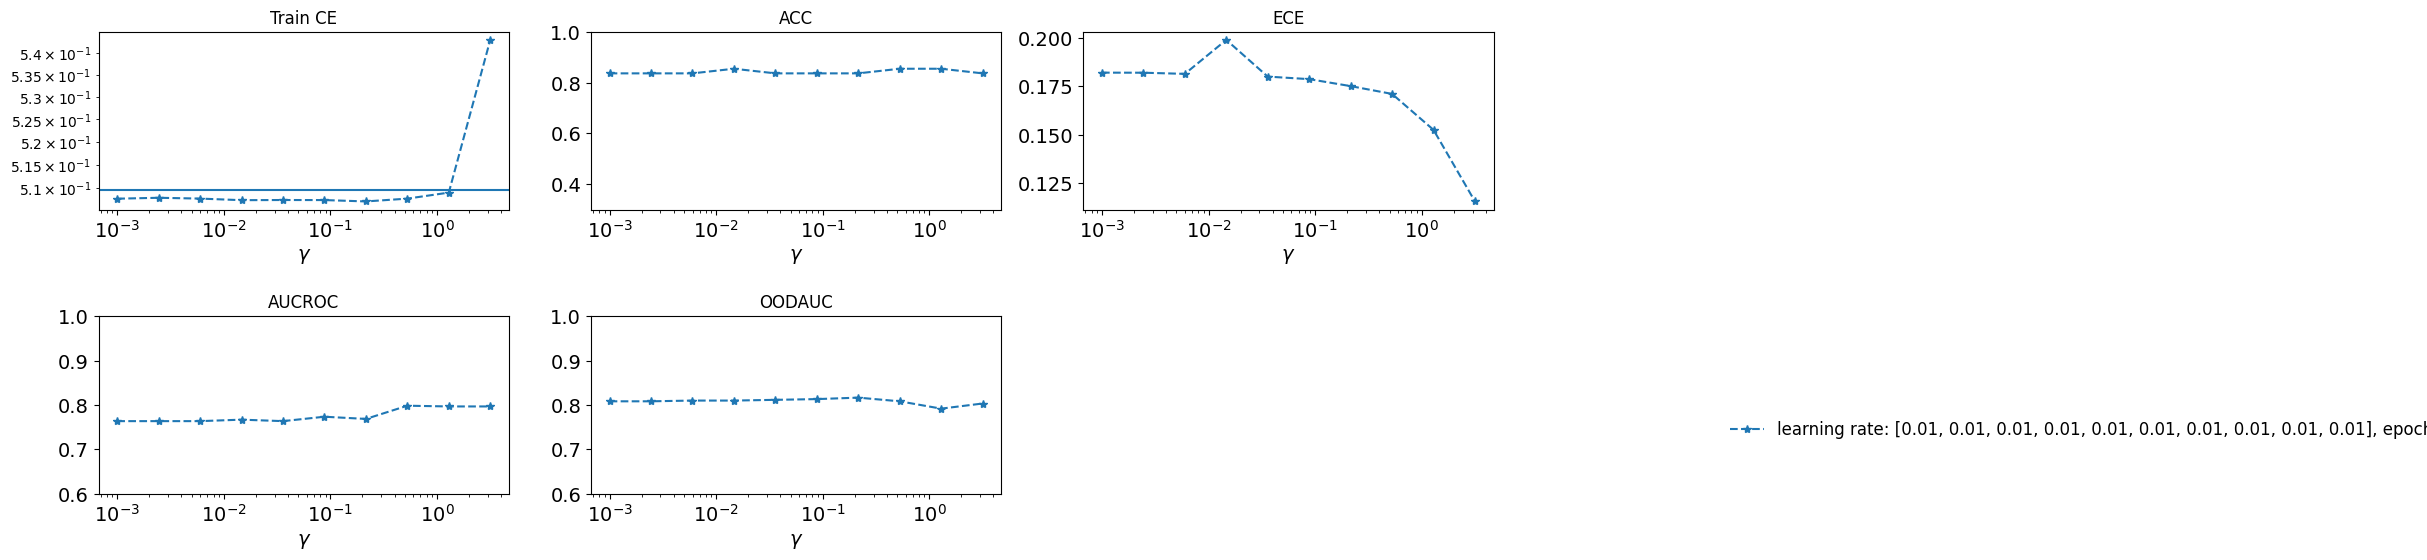

In [7]:
import matplotlib.pyplot as plt
import os
w, h, fs = 18, 6, 14

fig_save_folder = f'figures/nuqls_experiment/constant_loss/'
if not os.path.exists(fig_save_folder):
    os.makedirs(fig_save_folder)

# ax1 : loss
# ax2 : acc
# ax3 : ece
# ax4 : aucroc
# ax5 : oodauc
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3, figsize = (1*w,1*h))
fig.subplots_adjust(hspace=0.6)

label = f'learning rate: {lr}, epochs: {epoch}'

ax1.plot(plot_dict['gamma'], plot_dict['nuqls_train_loss'], '--*', label=label)
ax1.axhline(map_train_loss)
# ax1.set_ylim(0,20)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_title('Train CE')
ax1.set_xlabel('$\gamma$', fontsize=fs)
ax1.tick_params(labelsize=fs)

ax2.plot(plot_dict['gamma'], plot_dict['acc'], '--*', label=label)
ax2.set_title('ACC')
ax2.set_ylim(0.3,1)
ax2.set_xscale('log')
ax2.set_xlabel('$\gamma$', fontsize=fs)
ax2.tick_params(labelsize=fs)

ax3.plot(plot_dict['gamma'], plot_dict['ece'], '--*', label=label)
ax3.set_title('ECE')
ax3.set_xscale('log')
ax3.set_xlabel('$\gamma$', fontsize=fs)
ax3.tick_params(labelsize=fs)

ax4.plot(plot_dict['gamma'], plot_dict['aucroc'], '--*', label=label)
ax4.set_title('AUCROC')
ax4.set_ylim(0.6,1)
ax4.set_xscale('log')
ax4.set_xlabel('$\gamma$', fontsize=fs)
ax4.tick_params(labelsize=fs)

ax5.plot(plot_dict['gamma'], plot_dict['oodauc'], '--*', label=label)
ax5.set_title('OODAUC')
ax5.set_ylim(0.6,1)
ax5.set_xscale('log')
ax5.set_xlabel('$\gamma$', fontsize=fs)
ax5.tick_params(labelsize=fs)
# ax5.legend()

ax6.remove()

lines = [] 
labels = []

# for ax in fig.axes: 
Line, Label = ax1.get_legend_handles_labels() 
# print(Label) 
lines.extend(Line) 
labels.extend(Label)

fig.legend(lines, labels, loc=(0.71,0.205), prop={'size': 12}, frameon=False) 



plt.plot()
plt.savefig(fname=fig_save_folder + f'{dataset_model}_{bs}_gamma.pdf', format='pdf')
plt.show()


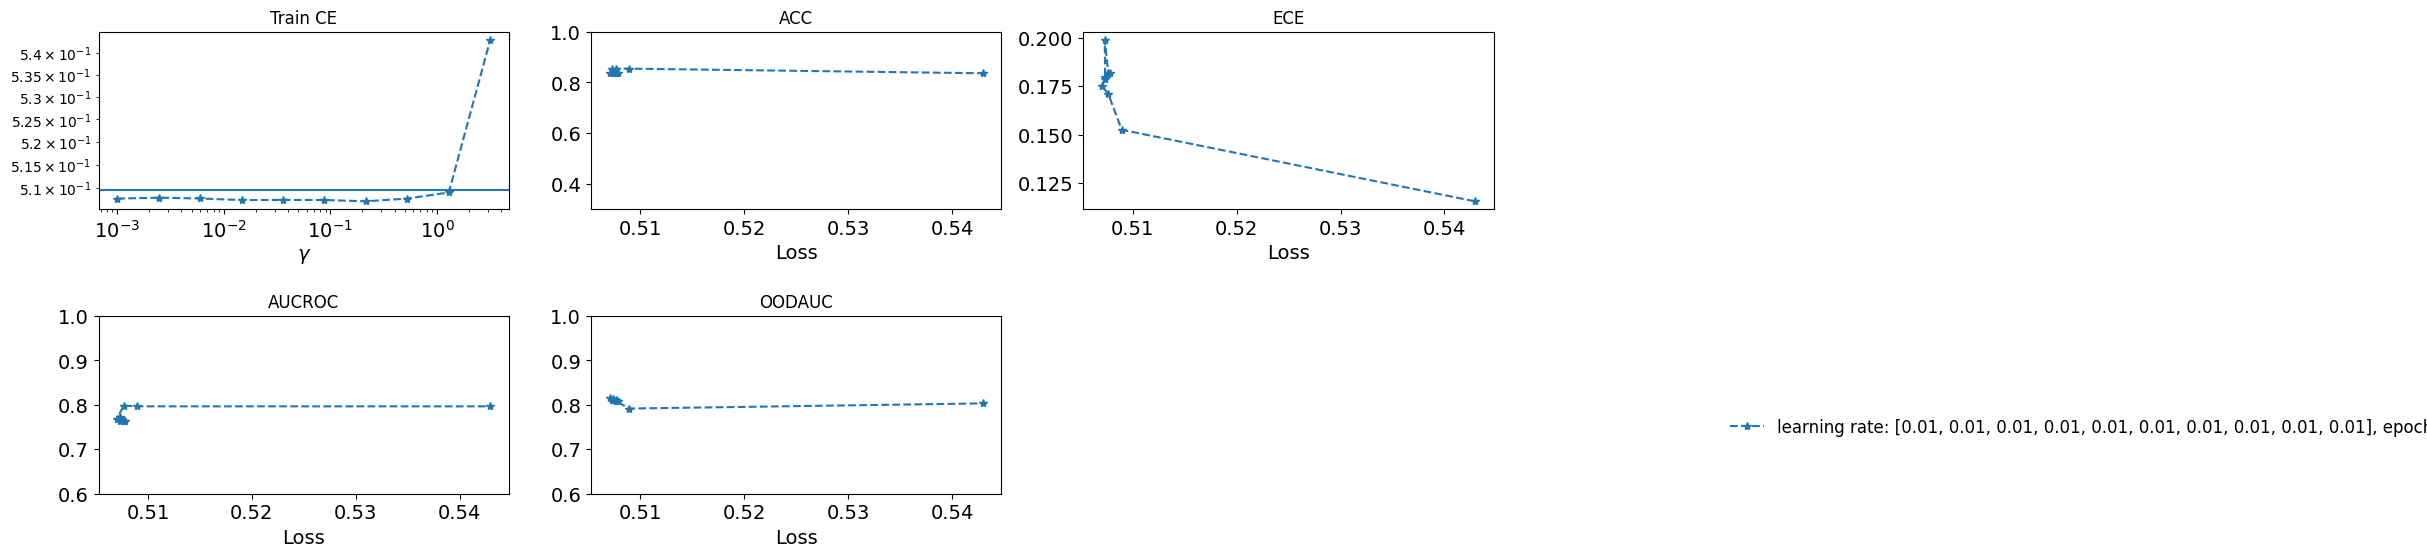

In [9]:
import matplotlib.pyplot as plt
import os
w, h, fs = 18, 6, 14

fig_save_folder = f'figures/nuqls_experiment/constant_loss/'
if not os.path.exists(fig_save_folder):
    os.makedirs(fig_save_folder)

# ax1 : loss
# ax2 : acc
# ax3 : ece
# ax4 : aucroc
# ax5 : oodauc
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3, figsize = (1*w,1*h))
fig.subplots_adjust(hspace=0.6)

label = f'learning rate: {lr}, epochs: {epoch}'

ax1.plot(plot_dict['gamma'], plot_dict['nuqls_train_loss'], '--*', label=label)
ax1.axhline(map_train_loss)
# ax1.set_ylim(0,20)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_title('Train CE')
ax1.set_xlabel('$\gamma$', fontsize=fs)
ax1.tick_params(labelsize=fs)

ax2.plot(plot_dict['nuqls_train_loss'], plot_dict['acc'], '--*', label=label)
ax2.set_title('ACC')
ax2.set_ylim(0.3,1)
# ax2.set_xscale('log')
ax2.set_xlabel('Loss', fontsize=fs)
ax2.tick_params(labelsize=fs)

ax3.plot(plot_dict['nuqls_train_loss'], plot_dict['ece'], '--*', label=label)
ax3.set_title('ECE')
# ax3.set_xscale('log')
ax3.set_xlabel('Loss', fontsize=fs)
ax3.tick_params(labelsize=fs)

ax4.plot(plot_dict['nuqls_train_loss'], plot_dict['aucroc'], '--*', label=label)
ax4.set_title('AUCROC')
ax4.set_ylim(0.6,1)
# ax4.set_xscale('log')
ax4.set_xlabel('Loss', fontsize=fs)
ax4.tick_params(labelsize=fs)

ax5.plot(plot_dict['nuqls_train_loss'], plot_dict['oodauc'], '--*', label=label)
ax5.set_title('OODAUC')
ax5.set_ylim(0.6,1)
# ax5.set_xscale('log')
ax5.set_xlabel('Loss', fontsize=fs)
ax5.tick_params(labelsize=fs)
# ax5.legend()

ax6.remove()

lines = [] 
labels = []

# for ax in fig.axes: 
Line, Label = ax1.get_legend_handles_labels() 
# print(Label) 
lines.extend(Line) 
labels.extend(Label)

fig.legend(lines, labels, loc=(0.71,0.205), prop={'size': 12}, frameon=False) 



plt.plot()
plt.savefig(fname=fig_save_folder + f'{dataset_model}_{bs}_gamma.pdf', format='pdf')
plt.show()
